In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
## create dtf

data = pd.read_csv("data.csv")

## dropping all columns except the following
data = data[['student_star','comments']]

# 5.0 to 4.0 - Good
# 3.5 to 2.5 - Average
# 2.0 to 1.0 - Bad

data['student_star'] = data['student_star'].replace([5.0],'Good')
data['student_star'] = data['student_star'].replace([4.5],'Good')
data['student_star'] = data['student_star'].replace([4.0],'Good')

data['student_star'] = data['student_star'].replace([3.5],'Average')
data['student_star'] = data['student_star'].replace([3.0],'Average')
data['student_star'] = data['student_star'].replace([2.5],'Average')

data['student_star'] = data['student_star'].replace([2.0],'Bad')
data['student_star'] = data['student_star'].replace([1.5],'Bad')
data['student_star'] = data['student_star'].replace([1.0],'Bad')

## rename columns
data = data.rename(columns={"student_star":"Labels", "comments":"Text"})

## dropping rows with na
data = data.dropna()

## print 5 random rows
data.sample(5)

## removing blank rows
data = data.dropna()

In [3]:
## Class distribution
data['Labels'].value_counts()

Good       11814
Bad         4764
Average     3415
Name: Labels, dtype: int64

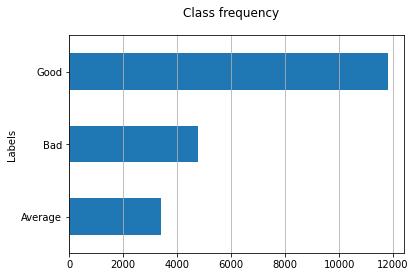

In [4]:
## Plotting class distribution
fig, ax = plt.subplots()
fig.suptitle("Class frequency", fontsize=12)
data["Labels"].reset_index().groupby("Labels").count().sort_values(by = "index").plot(kind = "barh", legend=False, ax=ax).grid(axis = 'x')
plt.show()

In [6]:
## Data snapshot
data.head()

,Labels,Text
0,Good,"This class is hard, but its a two-in-one gen-e..."
1,Good,Definitely going to choose Prof. Looney\'s cla...
2,Good,I overall enjoyed this class because the assig...
3,Good,"Yes, it\'s possible to get an A but you\'ll de..."
4,Good,Professor Looney has great knowledge in Astron...


In [7]:
## Split data into 70% training and 30% testing set

feature_cols = ['Text']
X = data[feature_cols]
y = data.Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
## Using count vectorizer to get features from words

vect = CountVectorizer(analyzer = "word")
X_train_dtm = vect.fit_transform(X_train.Text)
X_test_dtm = vect.transform(X_test.Text)
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(13995, 13805)
(5998, 13805)


In [22]:
## Preparing a dataframe to store the results

evaluation = []
evaluation = pd.DataFrame(evaluation, columns=['Approach', 'Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
evaluation.head()

,Approach,Algorithm,Accuracy,Precision,Recall,F1-Score


##### Loading the different ML models.
##### Training and Testing

c:\users\teacher\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



Logistic Regression:
	Accuracy: 0.6963987995998666
	Precision: 0.5959665098573731
	Recall: 0.5856079826566641
	F1-Score: 0.5898134720042226
Detail:
              precision    recall  f1-score   support

     Average       0.33      0.29      0.31      1020
         Bad       0.66      0.63      0.64      1450
        Good       0.79      0.84      0.82      3528

    accuracy                           0.70      5998
   macro avg       0.60      0.59      0.59      5998
weighted avg       0.68      0.70      0.69      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

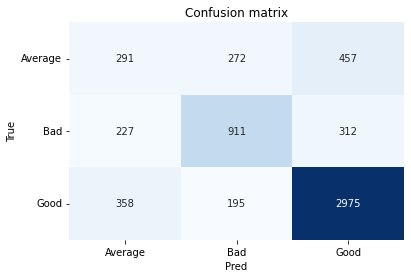

In [23]:
model = LogisticRegression(C=1e9)
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nLogistic Regression:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning and Count Vectorizer', 
           'Algorithm':'Logistic Regression', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


SVM:
	Accuracy: 0.7269089696565522
	Precision: 0.6294727039547966
	Recall: 0.5562413777771645
	F1-Score: 0.5509602481156941
Detail:
              precision    recall  f1-score   support

     Average       0.42      0.09      0.14      1020
         Bad       0.73      0.63      0.68      1450
        Good       0.74      0.95      0.83      3528

    accuracy                           0.73      5998
   macro avg       0.63      0.56      0.55      5998
weighted avg       0.68      0.73      0.68      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

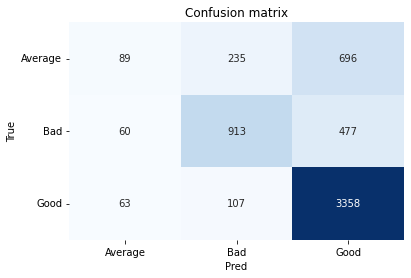

In [25]:
model = SVC()
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nSVM:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning and Count Vectorizer', 
           'Algorithm':'SVM', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


Multinomial NB:
	Accuracy: 0.7290763587862621
	Precision: 0.621438540138786
	Recall: 0.6102059061172361
	F1-Score: 0.6061731701515293
Detail:
              precision    recall  f1-score   support

     Average       0.39      0.22      0.28      1020
         Bad       0.67      0.74      0.70      1450
        Good       0.81      0.87      0.84      3528

    accuracy                           0.73      5998
   macro avg       0.62      0.61      0.61      5998
weighted avg       0.70      0.73      0.71      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

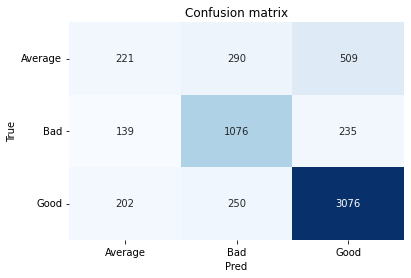

In [26]:
model = MultinomialNB()
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nMultinomial NB:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning and Count Vectorizer', 
           'Algorithm':'Multinomial NB', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


Decision Tree:
	Accuracy: 0.6307102367455819
	Precision: 0.5154763920575349
	Recall: 0.5075694032402233
	F1-Score: 0.5097747321228713
Detail:
              precision    recall  f1-score   support

     Average       0.25      0.20      0.22      1020
         Bad       0.56      0.53      0.54      1450
        Good       0.73      0.80      0.77      3528

    accuracy                           0.63      5998
   macro avg       0.52      0.51      0.51      5998
weighted avg       0.61      0.63      0.62      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

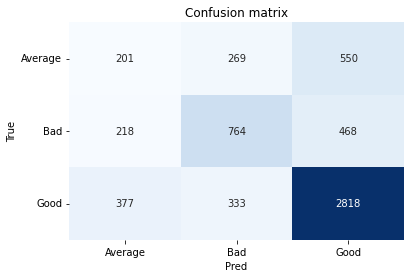

In [27]:
model = DecisionTreeClassifier()
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nDecision Tree:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning and Count Vectorizer', 
           'Algorithm':'Decision Tree', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


KNN:
	Accuracy: 0.5931977325775258
	Precision: 0.48457108008050137
	Recall: 0.4387645786283862
	F1-Score: 0.4444354554269041
Detail:
              precision    recall  f1-score   support

     Average       0.22      0.19      0.21      1020
         Bad       0.56      0.29      0.38      1450
        Good       0.68      0.83      0.75      3528

    accuracy                           0.59      5998
   macro avg       0.48      0.44      0.44      5998
weighted avg       0.57      0.59      0.57      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

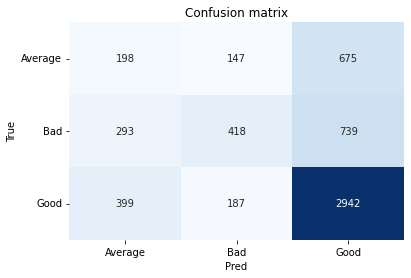

In [28]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nKNN:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning and Count Vectorizer', 
           'Algorithm':'KNN', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


Random Forest:
	Accuracy: 0.6960653551183728
	Precision: 0.657321842093765
	Recall: 0.4924393052240053
	F1-Score: 0.47590019713676296
Detail:
              precision    recall  f1-score   support

     Average       0.50      0.01      0.02      1020
         Bad       0.79      0.48      0.60      1450
        Good       0.68      0.98      0.80      3528

    accuracy                           0.70      5998
   macro avg       0.66      0.49      0.48      5998
weighted avg       0.68      0.70      0.62      5998



(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'Average'), Text(0, 1.5, 'Bad'), Text(0, 2.5, 'Good')])

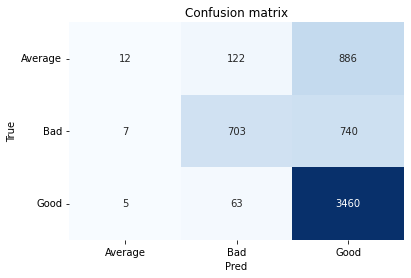

In [29]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_dtm, y_train)
y_pred_class = model.predict(X_test_dtm)

acuracy = metrics.accuracy_score(y_test, y_pred_class)
precision = metrics.precision_score(y_test, y_pred_class, average='macro')
recall = metrics.recall_score(y_test, y_pred_class, average='macro')
f1score = metrics.f1_score(y_test, y_pred_class, average='macro')

print("\nRandom Forest:")
print("\tAccuracy:",acuracy)
print("\tPrecision:",precision)
print("\tRecall:",recall)
print("\tF1-Score:",f1score)

new_row = {'Approach':'Machine Learning and Count Vectorizer', 
           'Algorithm':'Random Forest', 
           'Accuracy':acuracy, 
           'Precision':precision,
           'Recall':recall,
           'F1-Score':f1score
          }

evaluation = evaluation.append(new_row, ignore_index=True)


print("Detail:")
print(metrics.classification_report(y_test, y_pred_class))

classes = np.unique(y_test)

## Plot confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_class)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

In [30]:
evaluation

,Approach,Algorithm,Accuracy,Precision,Recall,F1-Score
0,Machine Learning and Count Vectorizer,Logistic Regression,0.696399,0.595967,0.585608,0.589813
1,Machine Learning and Count Vectorizer,SVM,0.726909,0.629473,0.556241,0.550960
2,Machine Learning and Count Vectorizer,Multinomial NB,0.729076,0.621439,0.610206,0.606173
3,Machine Learning and Count Vectorizer,Decision Tree,0.630710,0.515476,0.507569,0.509775
4,Machine Learning and Count Vectorizer,KNN,0.593198,0.484571,0.438765,0.444435
5,Machine Learning and Count Vectorizer,Random Forest,0.696065,0.657322,0.492439,0.475900


In [31]:
evaluation.to_csv('results.csv')